## Clasificación desempeño del estudiante (datos sin Indicador de Logro)

El modelo predice la calificación final del estudiante a partir de un algoritmo de clasificación, el umbral de desempeño es:

*   0 - Bajo desempeño (calificación entre 0.0 y 2.9)
*   1 - Medio desempeño (calificación entre 3.0 y 4.0)
*   2 - Alto desempeño (calificación entre 4.1 y 5.0)

Tareas
* Generar el balanceo de los datos.
* Seleccionar las mejores características.
* Dividir los datos en 80% para entrenamiento y 20% para pruebas
* Aplicar hiperparámetros (gridsearch) a los algoritmos: Naive Bayes (NB), SVM, Árbol de decisión (DT) y Bosque Aleatorio (RF).
* Entrenar los modelos con las mejores características.
* Obtener las métricas: matriz de confusión, accuracy, precisión, recall y f1 score.
* Crear una lista con los resultados f1 score obtenidos para los 4 algoritmos.
* Generar una gráfica de barras para identificar cúal fue el algoritmo que obtuvo los mejores resultados.

Diccionario de datos

Se importan las librerias

In [1]:
# Se importan las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


# Modelos Clasificación: Naive Bayes (NB), SVM, Árboles de Decisión (DT), Bosque Aleatorio (RF) 
# Libreria para Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Libreria para SVM
from sklearn.svm import SVC
# Libreria para árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Libreria para Bosque Aleatorio
from sklearn.ensemble import RandomForestClassifier

# Libreria para el resample 
from sklearn.utils import resample
# Mejores características - Eli5
#pip install eli5
from eli5 import show_weights 
# Libreria para dividir los datos de entrenamiento y de pruebas
from sklearn.model_selection import train_test_split
# Genera la matriz de confusión
from sklearn.metrics import confusion_matrix
# Gerera el reporte de la clasificación
from sklearn.metrics import classification_report
# Librerias para métricas del modelo
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Libreria para calcular la media y la desviación estándar utilizadas en las características
from sklearn.preprocessing import StandardScaler
# Libreria de búsqueda en cuadrícula
from sklearn.model_selection import GridSearchCV

## Se cargan los datos al dataframe

In [2]:
# Se cargan los registros en un DataFrame 
data = pd.read_csv("./data/student_performance.csv", sep=";")

data

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
0,4.4,0.63,2,3,4.4,4.9,2
1,3.3,0.33,1,3,3.3,3.7,1
2,4.7,0.78,3,3,4.3,4.8,2
3,4.3,0.28,1,3,4.0,4.9,2
4,4.2,0.50,10,3,3.1,4.9,1
...,...,...,...,...,...,...,...
463,2.2,3.89,6,3,3.0,3.5,1
464,4.6,0.35,1,0,0.0,0.0,0
465,4.6,0.48,1,0,5.0,0.0,1
466,4.6,0.00,0,0,0.0,0.0,0


## Pre procesamiento de los datos

In [3]:
# Se buscan registros NaN para eliminarlos
print('Columna         Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

# Se eliminan los registros NA
#data = data.dropna()

Columna         Cantidad NaN
lab_1                   0
tiempo_entrega_lab_1    0
intentos_lab_1          0
resultado_lab_1         0
lab_2                   0
lab_3                   0
grade                   0
dtype: int64
(468, 7)


In [4]:
# Se consulta la cantidad de registros para Grade
data.groupby('grade').size()

grade
0    162
1    200
2    106
dtype: int64

In [5]:
# Se realiza el resample 
df_alto = data[data['grade'] == 0]
df_bajo = data[data['grade'] == 1]
df_medio = data[data['grade'] == 2]

dftest = resample(df_alto,
                    replace = True,
                    n_samples = 200,
                    random_state = 1)

dftest2 = resample(df_medio,
                    replace = True,
                    n_samples = 200,
                    random_state = 1)

data2 = pd.concat([df_bajo, dftest, dftest2])

#dftest['grade'].value_counts()
#dftest2['grade'].value_counts()
data2['grade'].value_counts()

grade
1    200
0    200
2    200
Name: count, dtype: int64

In [6]:
# Se genera las estadísticas del DataFrame
data2.describe()

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000
mean,2.954000,2.202933,3.060000,2.621667,3.29350,4.044833,1.000000
std,1.854422,4.200492,4.514092,0.888733,1.83559,1.590888,0.817178
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.300000,1.000000,3.000000,1.60000,4.000000,0.000000
50%,3.550000,0.480000,1.000000,3.000000,4.00000,4.900000,1.000000
75%,4.700000,1.000000,3.000000,3.000000,4.90000,5.000000,2.000000
max,5.000000,22.080000,39.000000,3.000000,5.00000,5.000000,2.000000


In [7]:
# Se observa el tipo de datos de las columnas
data2.dtypes

lab_1                   float64
tiempo_entrega_lab_1    float64
intentos_lab_1            int64
resultado_lab_1           int64
lab_2                   float64
lab_3                   float64
grade                     int64
dtype: object

## Predicción con todas las características
### Se crea el set de entrenamiento y de pruebas


In [8]:
# Se definen los valores de las características	
features = ['lab_1','tiempo_entrega_lab_1','intentos_lab_1','resultado_lab_1',
            'lab_2','lab_3']
			
# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     train_size= 0.8,
                                                     random_state= 6)

### Mejores características Eli5

In [9]:
# Se crea el modelo
dtc = DecisionTreeClassifier() 
  
# Se entrena el modelo
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)

# Mejores caracteristicas - Eli5
from eli5 import show_weights

show_weights(dtc, feature_names = features)

Weight,Feature
0.4509,lab_1
0.3513,lab_2
0.1027,lab_3
0.0439,tiempo_entrega_lab_1
0.0360,resultado_lab_1
0.0151,intentos_lab_1


### Predicción con ajuste de Hiperparámetros (Grid Search)

In [10]:
# Se definen los valores de las características
features = ['lab_1','lab_2','resultado_lab_1']
# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     train_size= 0.8,
                                                     random_state= 6)

#### Naive Bayes

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()

# Parámetros

grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator = nb, 
                           param_grid = grid, 
                           cv= 10, 
                           verbose=1,
                           n_jobs=-1,  
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters (GridSearch): GaussianNB(var_smoothing=0.0005336699231206307)
-----------------------------------------------------------
[[28 20  0]
 [ 6 29  7]
 [ 0  0 30]]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        48
           1       0.59      0.69      0.64        42
           2       0.81      1.00      0.90        30

    accuracy                           0.73       120
   macro avg       0.74      0.76      0.74       120
weighted avg       0.74      0.72      0.72       120

Precisión:  0.74
Recall:  0.72
F1-Score:  0.72


#### SVM

In [12]:
##### INSERTE SU CÓDIGO AQUÍ #####
# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creación del clasificador
svm = SVC()

# Definición de los parámetros
grid = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Búsqueda de los mejores hiperparámetros
grid_search = GridSearchCV(estimator=svm,
                           param_grid=grid,
                           cv=10,
                           verbose=1,
                           n_jobs=-1,
                           scoring='accuracy')

searchResults = grid_search.fit(X_train, y_train.ravel())

# Obtener el mejor modelo y evaluarlo
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Entrenamiento del modelo con los mejores hiperparámetros
svm = bestModel
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, pred))

# Imprimir la precisión del modelo
print(classification_report(y_test, pred))

# Imprimir otras métricas de clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'), 2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'), 2))

Fitting 10 folds for each of 147 candidates, totalling 1470 fits
Best Parameters (GridSearch): SVC(C=1000.0, gamma=10.0)
-----------------------------------------------------------
[[45  3  0]
 [ 5 35  2]
 [ 0  0 30]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.92      0.83      0.88        42
           2       0.94      1.00      0.97        30

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

Precisión:  0.92
Recall:  0.92
F1-Score:  0.92


#### Árbol de Decisión (DT)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear un objeto del árbol de decisión
dt = DecisionTreeClassifier()

# Parámetros
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=grid, 
                           cv=10, 
                           verbose=1,
                           n_jobs=-1,  
                           scoring="accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# Extraer el mejor modelo y evaluarlo
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Crear un objeto con los mejores ajustes de Hiperparámetros
dt = bestModel

# Entrenar el modelo
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

# Imprimir la matriz de confusión
print(confusion_matrix(y_test, pred))

# Imprimir la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'), 2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'), 2))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Parameters (GridSearch): DecisionTreeClassifier(max_depth=7)
-----------------------------------------------------------
[[45  3  0]
 [ 6 35  1]
 [ 0  1 29]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        48
           1       0.90      0.83      0.86        42
           2       0.97      0.97      0.97        30

    accuracy                           0.91       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120

Precisión:  0.91
Recall:  0.91
F1-Score:  0.91


#### Bosque Aleatorio (RF)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier()

# Parámetros
grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf, 
                           param_grid=grid, 
                           cv=10, 
                           verbose=1, 
                           n_jobs=-1,
                           scoring='accuracy')

searchResults = grid_search.fit(X_train, y_train.ravel())

# extraer el mejor modelo y evaluarlo
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
rf = bestModel

# Se entrena el modelo
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'), 2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'), 2))

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Parameters (GridSearch): RandomForestClassifier(max_depth=10, n_estimators=10)
-----------------------------------------------------------
[[45  3  0]
 [ 4 36  2]
 [ 0  1 29]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.90      0.86      0.88        42
           2       0.94      0.97      0.95        30

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

Precisión:  0.92
Recall:  0.92
F1-Score:  0.92


### Gráfica de barras para la predicción

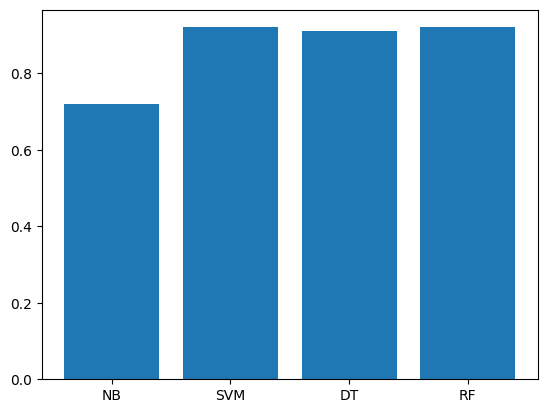

In [15]:
# F1-score
x = ['NB','SVM','DT','RF']
y = [0.72,0.92,0.91,0.92]
plt.bar(x,y)
plt.show()